## Processing Team Statistics
By: Jackson Isidor and Alex Sullivan

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [21]:
team_stats = pd.read_csv("/Users/jacksonisidor/Documents/March Madness Project/MM Data Sets/KenPom Barttorvik.csv")

# 2024 bracket isn't even made but they are still in the data set so just remove them
team_stats = team_stats[team_stats["YEAR"] != 2024]

team_stats.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
68,2023,SEC,28,60,4,1011,3,Alabama,1,16,...,4,44,10,353,19,146,163,33,6,10
69,2023,P12,24,60,4,1010,8,Arizona,2,64,...,7,24,5,184,8,218,163,12,66,35
70,2023,P12,24,57,1,1009,9,Arizona St.,11,64,...,131,169,70,114,54,288,102,244,46,45
71,2023,SEC,28,57,1,1008,10,Arkansas,8,16,...,58,14,132,330,11,287,163,120,35,26
72,2023,SEC,28,58,2,1007,12,Auburn,9,32,...,162,229,54,130,58,245,124,130,53,29


Discovered in other notebook that 2021 is missing a team, so dropping that year entirely here for consistency.

In [22]:
team_stats = team_stats[team_stats['YEAR'] != 2021]

In [23]:
identifier_columns = ['YEAR', 'CONF', 'CONF ID', 'QUAD NO', 'QUAD ID', 'TEAM NO', 'TEAM ID', 'TEAM', 'SEED', 'ROUND']

# columns with "RANK" in their names
rank_columns = [col for col in team_stats.columns if 'RANK' in col]

# columns without "RANK" in their names
non_rank_columns = [col for col in team_stats.columns if 'RANK' not in col]

# create separate dataframes for ranked and unranked stats
ranked_stats = team_stats[identifier_columns + rank_columns]
raw_stats = team_stats[non_rank_columns]

In [24]:
ranked_stats.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
68,2023,SEC,28,60,4,1011,3,Alabama,1,16,...,4,44,10,353,19,146,163,33,6,10
69,2023,P12,24,60,4,1010,8,Arizona,2,64,...,7,24,5,184,8,218,163,12,66,35
70,2023,P12,24,57,1,1009,9,Arizona St.,11,64,...,131,169,70,114,54,288,102,244,46,45
71,2023,SEC,28,57,1,1008,10,Arkansas,8,16,...,58,14,132,330,11,287,163,120,35,26
72,2023,SEC,28,58,2,1007,12,Auburn,9,32,...,162,229,54,130,58,245,124,130,53,29


In [25]:
raw_stats.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,AVG HGT,EFF HGT,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB
68,2023,SEC,28,60,4,1011,3,Alabama,1,16,...,78.117,82.068,1.130,66.119,72.6,71.4,1.106,0.922,33.700,10.2
69,2023,P12,24,60,4,1010,8,Arizona,2,64,...,78.469,82.474,1.986,73.326,70.9,71.4,1.134,0.981,29.572,7.6
70,2023,P12,24,57,1,1009,9,Arizona St.,11,64,...,77.112,80.955,2.242,48.279,68.9,70.2,1.006,0.968,28.637,1.3
71,2023,SEC,28,57,1,1008,10,Arkansas,8,16,...,78.723,80.357,1.415,70.997,69.0,71.4,1.058,0.958,30.654,0.4
72,2023,SEC,28,58,2,1007,12,Auburn,9,32,...,76.740,81.101,2.195,47.081,70.2,70.5,1.054,0.972,30.519,1.1


#### Getting correlations with round (our target variable for prediction):
"ROUND" is a categorical variable, but it is ordinal and numeric, so we can get reasonable correlations. The number round means the round they lost in. For example, 32 means the team lost in the round of 32
- 32 teams make it to this round, 16 advance, so there are 16 teams each year with the round value of 32 

In [26]:
non_identifier_columns = [col for col in raw_stats.columns if col not in identifier_columns]

raw_corrs = (raw_stats[non_identifier_columns + ["ROUND"]].corr()["ROUND"]**2).sort_values(ascending=False)
raw_corrs

ROUND        1.000000
WAB          0.351344
BADJ EM      0.349574
KADJ EM      0.346360
BARTHAG      0.266437
TALENT       0.247029
BADJ O       0.228745
KADJ O       0.220170
KADJ D       0.218621
BADJ D       0.217657
ELITE SOS    0.211057
WIN%         0.152002
PPPO         0.112984
K OFF        0.108464
PPPD         0.085538
W            0.083107
AVG HGT      0.083046
K DEF        0.081130
EFF HGT      0.061758
EFG%D        0.057475
OREB%        0.051116
OP DREB%     0.051116
BLK%         0.050561
2PT%D        0.045141
TOV%         0.030793
2PT%         0.029485
L            0.026617
EFG%         0.026574
FTRD         0.025030
EXP          0.023232
GAMES        0.022916
3PT%D        0.022628
BLKED%       0.015251
AST%         0.011946
FTR          0.009877
3PT%         0.006124
TOV%D        0.004220
OP FT%       0.004085
DREB%        0.002537
OP OREB%     0.002537
FT%          0.001727
2PTR         0.000999
3PTR         0.000999
KADJ T       0.000807
RAW T        0.000592
K TEMPO   

In [27]:
non_identifier_columns = [col for col in ranked_stats.columns if col not in identifier_columns]

ranked_corrs = (ranked_stats[non_identifier_columns + ["ROUND"]].corr()["ROUND"]**2).sort_values(ascending=False)
ranked_corrs[(ranked_corrs > 0.1) & (ranked_corrs < 1)]

BARTHAG RANK      0.253454
BADJ EM RANK      0.252085
KADJ EM RANK      0.246662
ELITE SOS RANK    0.205830
BADJ D RANK       0.205626
TALENT RANK       0.204953
KADJ D RANK       0.200475
BADJ O RANK       0.190356
KADJ O RANK       0.183899
PPPO RANK         0.100214
Name: ROUND, dtype: float64

The raw stats seem to be more correlated with rank, so I will continue with that dataset.

#### Only keep variables with higher correlations (>0.1)

In [28]:
filtered_columns = raw_corrs[(raw_corrs > 0.1) & (raw_corrs < 1)].index.tolist() + ["AVG HGT"]
raw_stats = raw_stats[identifier_columns + filtered_columns]

In [29]:
raw_stats.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,TALENT,BADJ O,KADJ O,KADJ D,BADJ D,ELITE SOS,WIN%,PPPO,K OFF,AVG HGT
68,2023,SEC,28,60,4,1011,3,Alabama,1,16,...,66.119,115.4,116.097,88.5549,88.3,33.700,85.294118,1.106,110.862,78.117
69,2023,P12,24,60,4,1010,8,Arizona,2,64,...,73.326,119.7,119.979,97.1195,95.4,29.572,82.352941,1.134,113.208,78.469
70,2023,P12,24,57,1,1009,9,Arizona St.,11,64,...,48.279,105.8,107.586,95.2101,93.8,28.637,64.705882,1.006,100.983,77.112
71,2023,SEC,28,57,1,1008,10,Arkansas,8,16,...,70.997,110.7,112.596,93.9677,92.0,30.654,60.606061,1.058,105.743,78.723
72,2023,SEC,28,58,2,1007,12,Auburn,9,32,...,47.081,110.9,112.689,95.2408,93.2,30.519,62.500000,1.054,105.387,76.740


In [30]:
raw_stats.columns

Index(['YEAR', 'CONF', 'CONF ID', 'QUAD NO', 'QUAD ID', 'TEAM NO', 'TEAM ID',
       'TEAM', 'SEED', 'ROUND', 'WAB', 'BADJ EM', 'KADJ EM', 'BARTHAG',
       'TALENT', 'BADJ O', 'KADJ O', 'KADJ D', 'BADJ D', 'ELITE SOS', 'WIN%',
       'PPPO', 'K OFF', 'AVG HGT'],
      dtype='object')

In [31]:
raw_stats.to_csv("raw_stats.csv") 

Description of each predictor variable remaining(from Kaggle):

- BADJ EM    : Estimates how many points a team would outscore the average Division I basketball team by over the course of 100 possessions.
- WAB       :   The expected winning percentage for an average bubble team in each game of a team's schedule subtracted from the total of the team's actual wins.
- KADJ EM   :   Estimates how many points a team would outscore the average Division I basketball team by over the course of 100 possesions.
- BARTHAG   :   Power Rating (Chance of beating the average Division I basketball team).
- TALENT   :    Evaluates how the average talent of a team; metric based on recruiting rank of players.
- BADJ O   :    Estimates how many points a team would score against the average Division I basketball offense over the course of 100 possessions.
- KADJ O   :    Estimates how many points a team would score against the average Division I basketball offense over the course of 100 possessions.
- BADJ D   :    Estimates how many points a team would allow against the average Division I basketball defense over the course of 100 possessions.
- KADJ D   :    Estimates how many points a team would allow against the average Division I basketball defense over the course of 100 possessions.
- ELITE SOS  :  The percentage of games an elite team would expect to lose against a given schedule.
- WIN%    :    The percent of games a team has won.
- PPPO :        The average amount of points a team scores per possession.
- K OFF:       Raw offensive efficiency.

Something to note is that every BADJ variable has the same description as each corresponding KADJ variable (BADJ EM == KADJ EM). The actual values in these variables are different, but very close, which is why they appear next to each other in the correlation rankings.

I can't find much information online, but they are so similar that I feel comfortable only using one of them. I will use BADJ because it appeared slightly higher on the correlations. 

In [32]:
kadj_columns = [col for col in raw_stats.columns if 'KADJ' in col]
raw_stats.drop(columns=kadj_columns, inplace=True)

In [33]:
raw_stats.head()

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJ EM,BARTHAG,TALENT,BADJ O,BADJ D,ELITE SOS,WIN%,PPPO,K OFF,AVG HGT
68,2023,SEC,28,60,4,1011,3,Alabama,1,16,...,27.1,0.956,66.119,115.4,88.3,33.700,85.294118,1.106,110.862,78.117
69,2023,P12,24,60,4,1010,8,Arizona,2,64,...,24.3,0.932,73.326,119.7,95.4,29.572,82.352941,1.134,113.208,78.469
70,2023,P12,24,57,1,1009,9,Arizona St.,11,64,...,12.0,0.800,48.279,105.8,93.8,28.637,64.705882,1.006,100.983,77.112
71,2023,SEC,28,57,1,1008,10,Arkansas,8,16,...,18.7,0.894,70.997,110.7,92.0,30.654,60.606061,1.058,105.743,78.723
72,2023,SEC,28,58,2,1007,12,Auburn,9,32,...,17.7,0.881,47.081,110.9,93.2,30.519,62.500000,1.054,105.387,76.740


#### More exploratory data analysis 

First make some scatterplots:

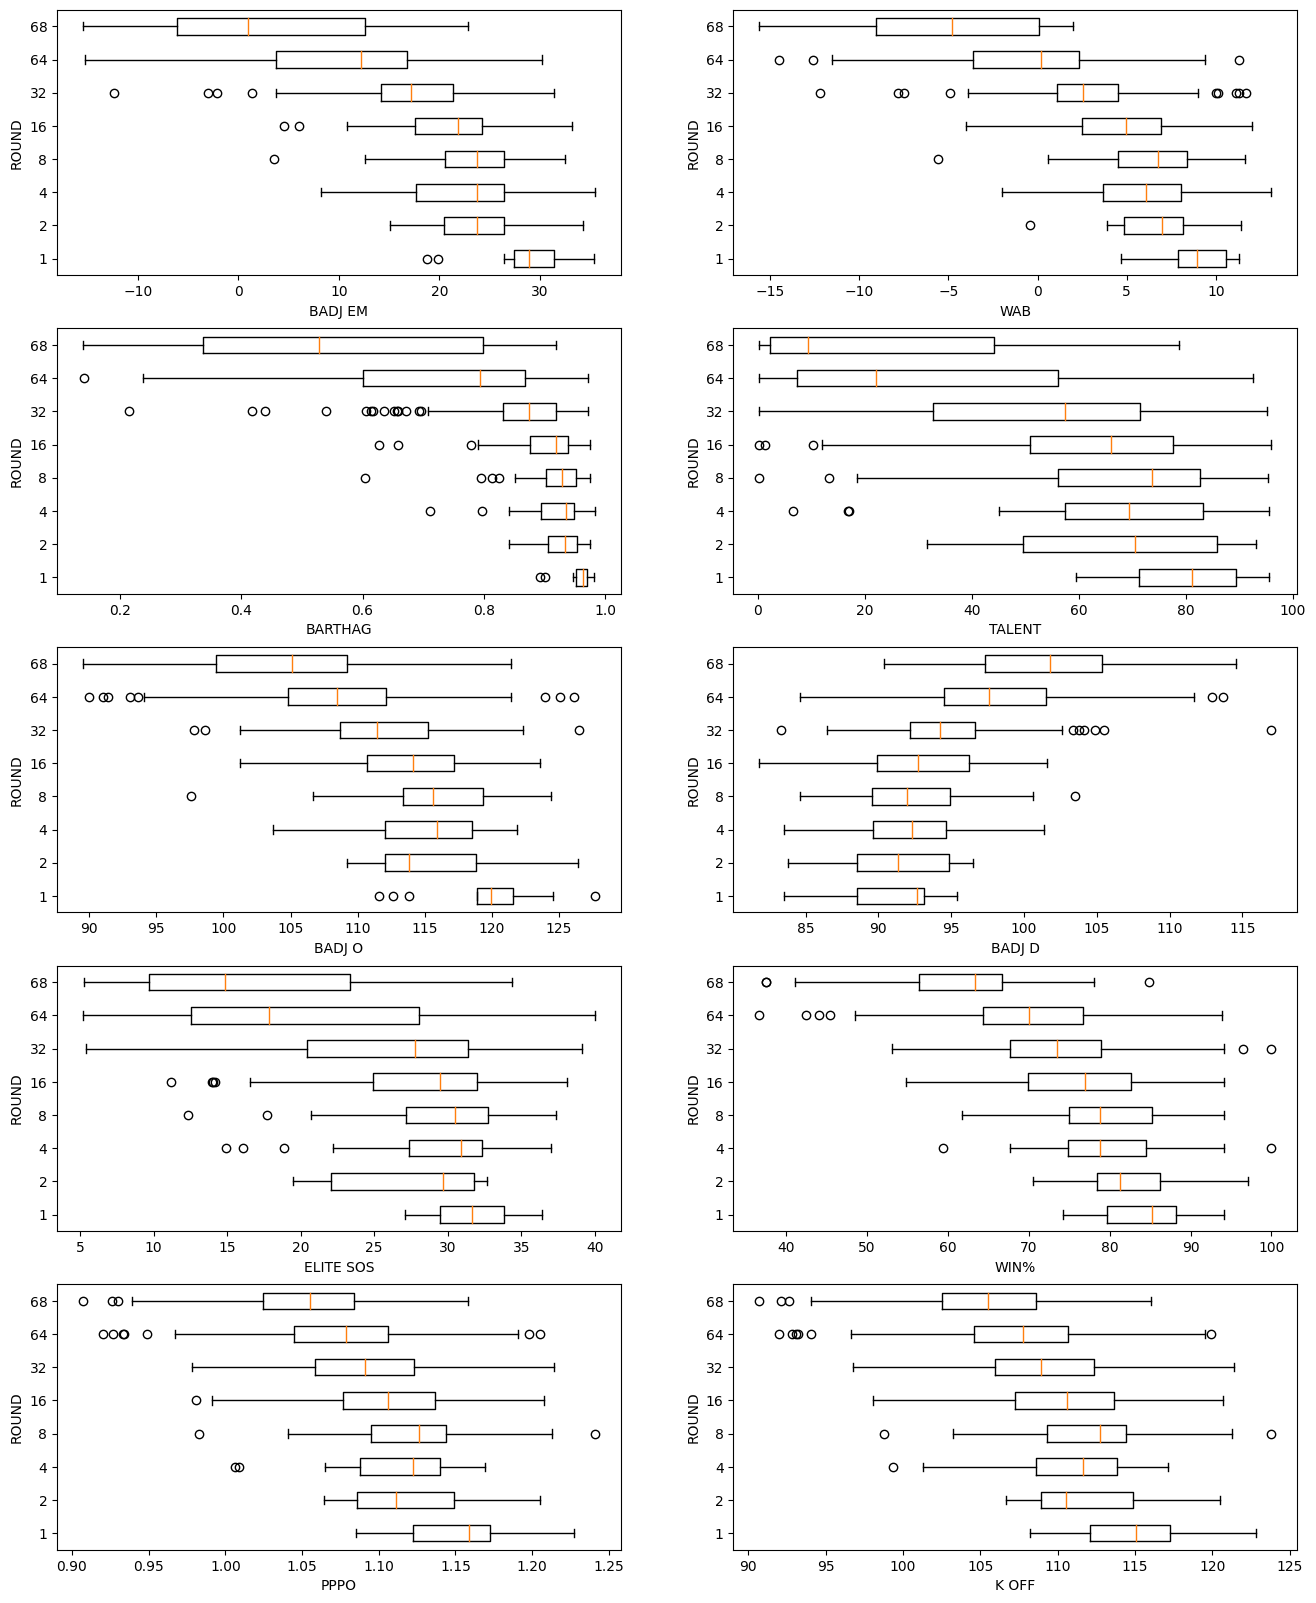

In [34]:
predictors = ["BADJ EM", "WAB", "BARTHAG", "TALENT", "BADJ O", "BADJ D", "ELITE SOS", "WIN%", "PPPO", "K OFF"]
target = "ROUND"

# create subplots
num_rows = len(predictors) // 2
num_cols = 2
fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, 20))

round_values_sorted = sorted(raw_stats[target].unique())

for i, predictor in enumerate(predictors):
    row = i // num_cols
    col = i % num_cols
    ax[row, col].boxplot([raw_stats[raw_stats[target] == round][predictor] for round in round_values_sorted], vert=False)
    ax[row, col].set_xlabel(predictor)
    ax[row, col].set_ylabel(target)
    ax[row, col].set_yticklabels(round_values_sorted)
    
plt.show()

All of these variables seem to have some sort of correlation to the round. There is a lot of overlap in the distributions, as expected due to the randomness of March Madness. 

May do a grid search of variables later to test all the combinations, because all of these to be helpful in predicting round. Also, These variables are probably heavily related too because good teams generally have lots of good stats, and bad teams generally have lots of bad. I may be able to eliminate some variables by investigating which are closely related. 

Something I notice right away is that I likely do not need BADJ O and BADJ D if I have BADJ EM because I believe that BADJ EM is just the difference between the two other variables. I can also drop some variables we won't use like conferance and quad no.

In [35]:
raw_stats.drop(columns=["CONF", "CONF ID", "QUAD NO", "QUAD ID", "TEAM NO",
                       "TEAM ID"], inplace=True)

In [36]:
raw_stats.head()

,YEAR,TEAM,SEED,ROUND,WAB,BADJ EM,BARTHAG,TALENT,BADJ O,BADJ D,ELITE SOS,WIN%,PPPO,K OFF,AVG HGT
68,2023,Alabama,1,16,10.2,27.1,0.956,66.119,115.4,88.3,33.700,85.294118,1.106,110.862,78.117
69,2023,Arizona,2,64,7.6,24.3,0.932,73.326,119.7,95.4,29.572,82.352941,1.134,113.208,78.469
70,2023,Arizona St.,11,64,1.3,12.0,0.800,48.279,105.8,93.8,28.637,64.705882,1.006,100.983,77.112
71,2023,Arkansas,8,16,0.4,18.7,0.894,70.997,110.7,92.0,30.654,60.606061,1.058,105.743,78.723
72,2023,Auburn,9,32,1.1,17.7,0.881,47.081,110.9,93.2,30.519,62.500000,1.054,105.387,76.740


In [37]:
raw_stats.to_csv("raw_stats.csv") 

In [38]:
raw_stats[(raw_stats["TEAM"] == "Xavier") & (raw_stats["YEAR"]==2023)]

,YEAR,TEAM,SEED,ROUND,WAB,BADJ EM,BARTHAG,TALENT,BADJ O,BADJ D,ELITE SOS,WIN%,PPPO,K OFF,AVG HGT
135,2023,Xavier,3,16,5.2,20.2,0.895,53.584,118.6,98.4,31.866,73.529412,1.129,112.788,78.386
